In [23]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Define the columns to use
use_cols = [
    "Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime",
    "ArrTime", "CRSArrTime", "Reporting_Airline", "Flight_Number_Reporting_Airline",
    "Tail_Number", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay",
    "DepDelay", "Origin", "Dest", "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay",
    "SecurityDelay", "LateAircraftDelay"
]

# Calculate the total number of rows in the dataset (excluding the header)
total_rows = sum(1 for _ in open("On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv")) - 1

# Define the sample size and generate skip indices
sample_size = 100000
skip_rows = np.random.choice(range(1, total_rows + 1), total_rows - sample_size, replace=False)
skip_rows = np.sort(skip_rows)  # Sort the indices

# Read the CSV in chunks
reader = pd.read_csv(
    "On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv",
    usecols=use_cols,
    skiprows=skip_rows,
    chunksize=1000
)

# Concatenate chunks into a single DataFrame
df = pd.concat([chunk for chunk in reader])

# Now you can process result_df as needed
print(df.head())

   Year  Month  DayofMonth  DayOfWeek Reporting_Airline Tail_Number  \
0  2019      1           4          5                OO      N145SY   
1  2019      1           4          5                OO      N787SK   
2  2019      1           4          5                OO      N211SY   
3  2019      1           4          5                OO      N956SW   
4  2019      1           4          5                OO      N161SY   

   Flight_Number_Reporting_Airline Origin Dest  CRSDepTime  ...  Diverted  \
0                             5668    DEN  DFW         803  ...         0   
1                             5674    SFO  ASE        1050  ...         0   
2                             5682    SFO  DFW         830  ...         0   
3                             5689    SFO  PSC        1255  ...         0   
4                             5691    ORD  BOI        1930  ...         0   

   CRSElapsedTime  ActualElapsedTime  AirTime  Distance  CarrierDelay  \
0           124.0              129.0 

           ArrDelay      DepDelay  CarrierDelay  WeatherDelay      NASDelay  \
count  96966.000000  97254.000000  17877.000000  17877.000000  17877.000000   
mean       4.208950      9.704115     19.939867      4.662695     18.972199   
std       50.831606     48.000850     63.501015     40.820046     42.797383   
min      -79.000000    -32.000000      0.000000      0.000000      0.000000   
25%      -16.000000     -6.000000      0.000000      0.000000      0.000000   
50%       -7.000000     -3.000000      0.000000      0.000000      6.000000   
75%        7.000000      5.000000     17.000000      0.000000     22.000000   
max     1609.000000   1637.000000   1426.000000   1270.000000   1068.000000   

       SecurityDelay  LateAircraftDelay  
count   17877.000000       17877.000000  
mean        0.062818          24.819824  
std         1.591374          48.822977  
min         0.000000           0.000000  
25%         0.000000           0.000000  
50%         0.000000           0.000

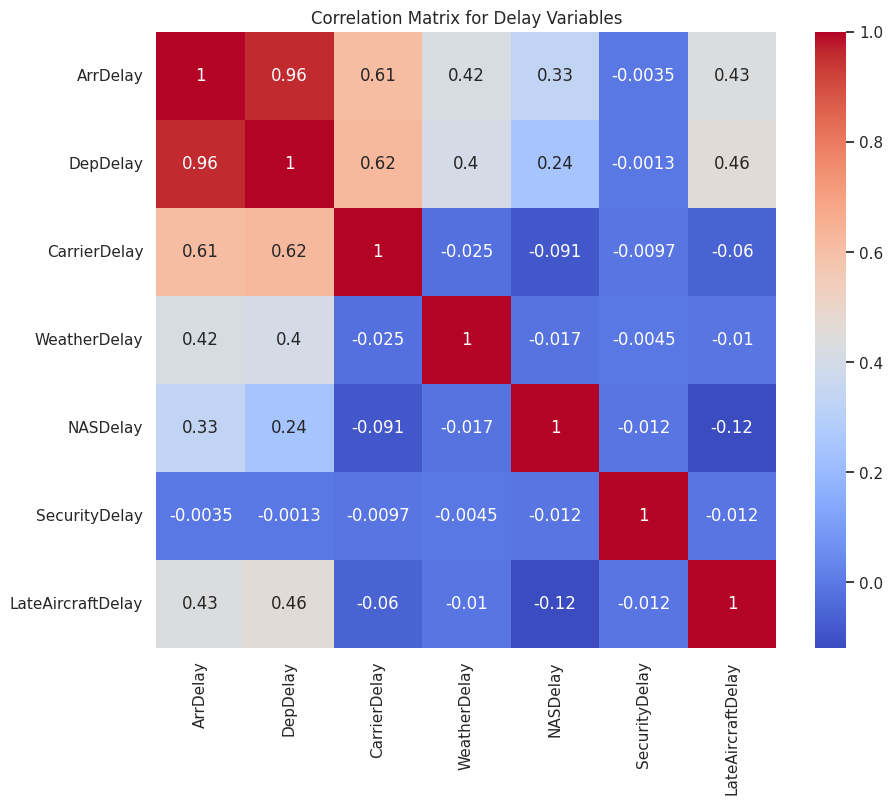

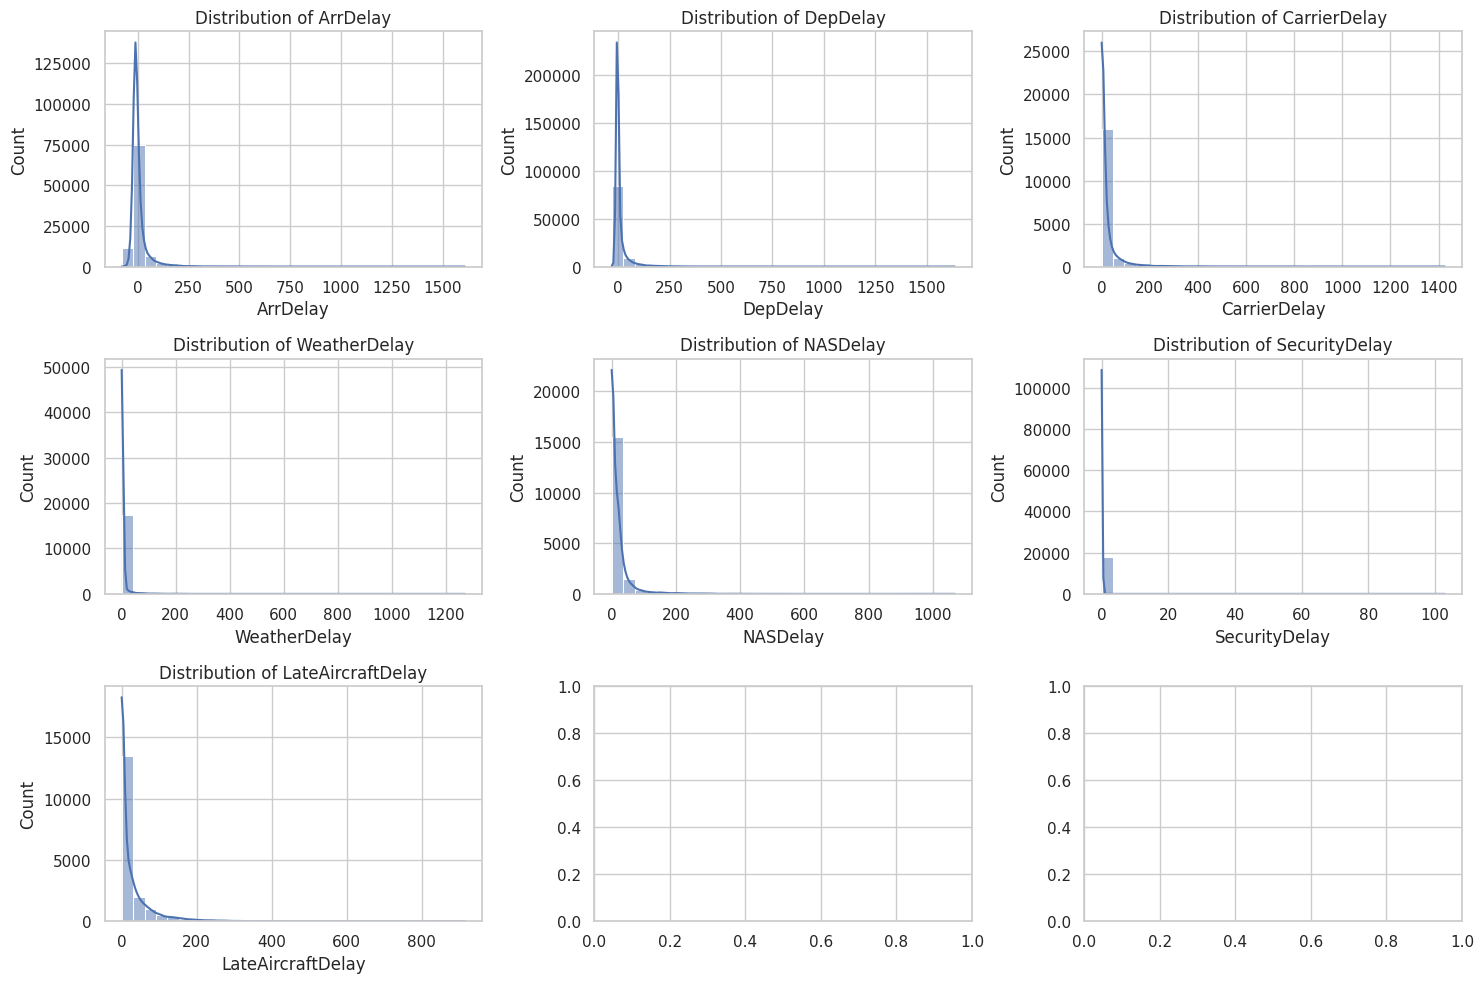

In [12]:
# Basic statistics
delay_stats = df[['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay',
                  'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].describe()
print(delay_stats)

# Correlation matrix
delay_correlation = df[['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay',
                        'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(delay_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Delay Variables')
plt.show()

# Distribution plots for delay variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay',
                           'NASDelay', 'SecurityDelay', 'LateAircraftDelay']):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


**Arrival and Departure Delays**: The strong positive correlation (around 0.96) between ArrDelay and DepDelay indicates that flights that depart late are highly likely to arrive late, which is intuitive since departure delays can have a cascading effect on the arrival times.

**Carrier Delays**: There is a moderate positive correlation between CarrierDelay with both ArrDelay and DepDelay (around 0.61 and 0.62, respectively), suggesting that issues under the airline's control contribute significantly to overall flight delays.

**Weather Delays**: WeatherDelay shows a weaker positive correlation with ArrDelay and DepDelay (around 0.42 and 0.4). This indicates that weather impacts delays, but not as strongly as carrier-related issues.

**Security Delays**: SecurityDelay is negligibly correlated with both ArrDelay and DepDelay, indicating that security issues rarely affect the flight's arrival and departure times.

**SKEWNESS**

**ArrDelay, DepDelay, CarrierDelay, WeatherDelay, NASDelay, and LateAircraftDelay**: All these delays show highly right-skewed distributions, with the majority of flights having little to no delay, and a long tail of flights experiencing longer delays. This is typical for delay data, where there are many on-time or slightly late flights and fewer but significant instances of large delays.

**SecurityDelay**: This variable shows an extreme right skew, with the vast majority of flights experiencing no security delay, and very few flights having a significant security delay. The distribution suggests that security delays are very uncommon.

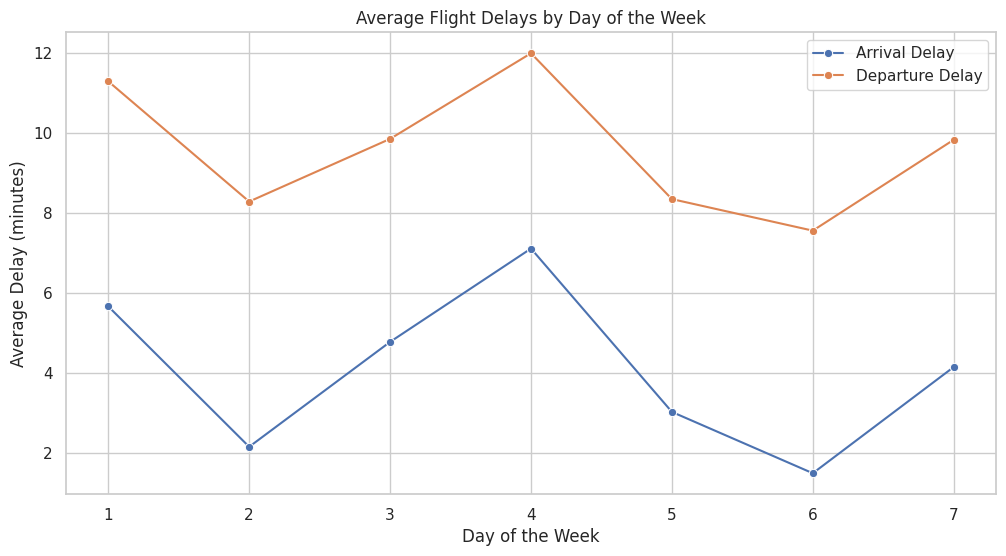

In [16]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Group by DayOfWeek and calculate average delays
weekly_delays = df.groupby('DayOfWeek')[['ArrDelay', 'DepDelay']].mean().reset_index()

# Plotting delays by day of the week
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_delays, x='DayOfWeek', y='ArrDelay', marker='o', label='Arrival Delay')
sns.lineplot(data=weekly_delays, x='DayOfWeek', y='DepDelay', marker='o', label='Departure Delay')
plt.title('Average Flight Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.show()

There is a noticeable peak in both arrival and departure delays around mid-week, suggesting that certain operational challenges or higher volumes of air traffic may occur on these days.

The trend dips towards the weekend, indicating that there might be fewer delays during these days, which could be due to less congestion or different travel patterns.

       CRSElapsedTime  ActualElapsedTime      AirTime
count    99971.000000       96966.000000  96966.00000
mean       143.887067         138.937916    113.03361
std         73.462449          73.314054     71.44742
min         20.000000          16.000000      8.00000
25%         90.000000          85.000000     61.00000
50%        125.000000         121.000000     95.00000
75%        175.000000         170.000000    143.00000
max        685.000000         698.000000    676.00000


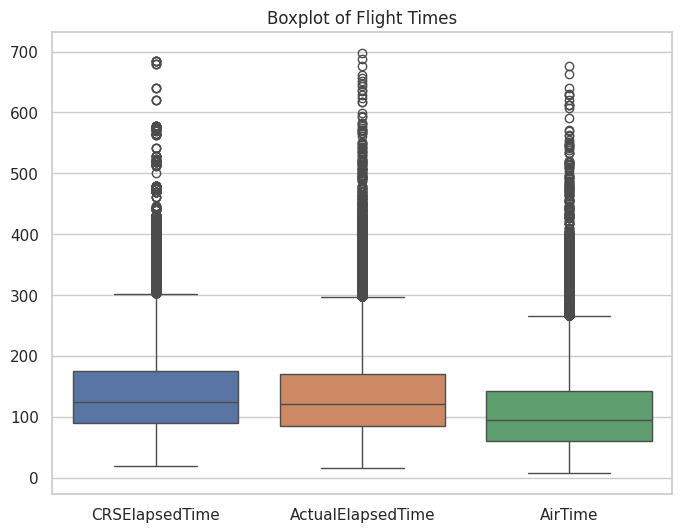

In [21]:
# Basic statistics
time_stats = df[['CRSElapsedTime', 'ActualElapsedTime', 'AirTime']].describe()
print(time_stats)

# Define numeric columns for min and max calculation
numeric_columns = ['CRSElapsedTime', 'ActualElapsedTime', 'AirTime']

# Get the global minimum and maximum across the specified numeric columns only
global_min = df[numeric_columns].min().min()
global_max = df[numeric_columns].max().max()

# # Scatter plot to compare planned vs actual elapsed times
# plt.figure(figsize=(8, 6))
# plt.scatter(df['CRSElapsedTime'], df['ActualElapsedTime'], alpha=0.5)
# plt.xlabel('CRS Elapsed Time (min)')
# plt.ylabel('Actual Elapsed Time (min)')
# plt.title('CRS vs Actual Elapsed Time Comparison')
# plt.plot([df.min().min(), df.max().max()], [df.min().min(), df.max().max()], 'r--')  # Identity line
# plt.show()

# Boxplot to view outliers in flight times
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['CRSElapsedTime', 'ActualElapsedTime', 'AirTime']])
plt.title('Boxplot of Flight Times')
plt.show()

Comparing AirTime to Elapsed Times shows that while in-flight times are generally consistent, the total time from departure to arrival can vary more significantly, likely due to ground operations.

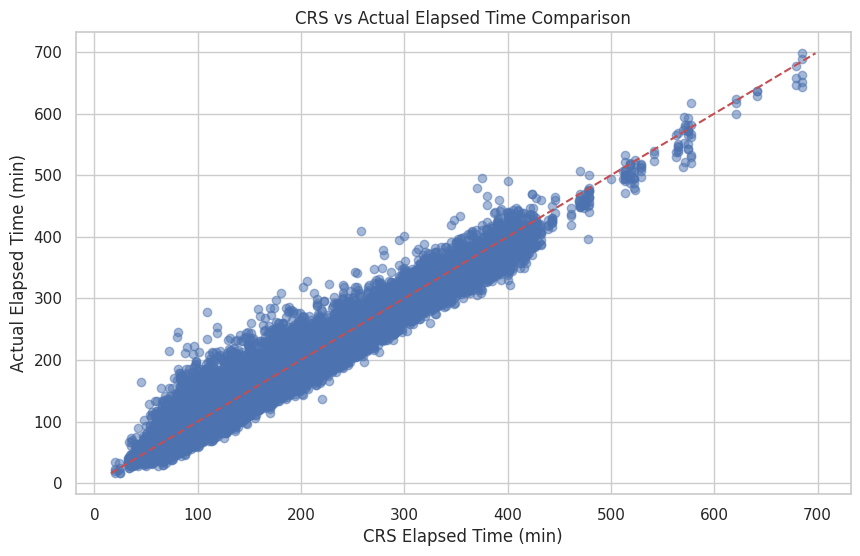

In [20]:
# Define the numeric columns that you want to consider for the plot
numeric_columns_for_plot = ['CRSElapsedTime', 'ActualElapsedTime']

# Calculate the min and max across these numeric columns only
plot_min = df[numeric_columns_for_plot].min().min()
plot_max = df[numeric_columns_for_plot].max().max()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['CRSElapsedTime'], df['ActualElapsedTime'], alpha=0.5)
plt.xlabel('CRS Elapsed Time (min)')
plt.ylabel('Actual Elapsed Time (min)')
plt.title('CRS vs Actual Elapsed Time Comparison')

# Plot the identity line using the numeric min and max
plt.plot([plot_min, plot_max], [plot_min, plot_max], 'r--')  # Identity line

plt.show()

The scatter plot shows a strong positive correlation between CRS Elapsed Time and Actual Elapsed Time, as indicated by the dense clustering of data points along the identity line.

Most flights appear to have actual elapsed times that closely match or slightly exceed their scheduled times, as shown by the data points that hover around or just above the red dashed line.

There are some notable exceptions where flights have significantly higher actual times than scheduled, visible as points far above the identity line, which could be due to various delays.